In this tutorial, the train and test data are from two different files. While the train data contains the lithofacies used for training the model, the test data do not. A single dataframe which is divided into the train and test dataframe is used for this example

In [1]:
import petroeval as pet
import petroeval.pseudomodes as pds
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('leaderboard_test_features.csv.txt', sep=';')

In [3]:
df.WELL.value_counts()

34/10-16 R    25095
29/3-1        24213
15/9-14       20281
34/3-3 A      18190
35/6-2 S      13415
25/5-3        11324
25/10-10       9320
34/6-1 S       6479
35/9-8         4274
25/11-24       4195
Name: WELL, dtype: int64

In [4]:
# randomly selecting two wells from the data as the test wells

well1 = df.loc[df.WELL == '34/6-1 S']
well2 = df.loc[df.WELL == '15/9-14']

test = pd.concat((well1, well2))                 

In [5]:
# removing the test wells from the train data

train = df.loc[df.WELL != '34/6-1 S']
train = train.loc[train.WELL != '15/9-14']

In [6]:
df.shape, train.shape, test.shape

((136786, 27), (110026, 27), (26760, 27))

In [11]:
lithology_numbers = {30000: 0,
                        65030: 1,
                        65000: 2,
                        80000: 3,
                        74000: 4,
                        70000: 5,
                        70032: 6,
                        88000: 7,
                        86000: 8,
                        99000: 9,
                        90000: 10,
                        93000: 11}

labels = pd.read_csv('leaderboard_test_target.csv.txt', sep=';')
labels['FORCE_2020_LITHOFACIES_LITHOLOGY'] = labels.FORCE_2020_LITHOFACIES_LITHOLOGY.map(lithology_numbers)

In [12]:
label1 = labels.loc[labels.WELL == '34/6-1 S'].FORCE_2020_LITHOFACIES_LITHOLOGY
label2 = labels.loc[labels.WELL == '15/9-14'].FORCE_2020_LITHOFACIES_LITHOLOGY

test_labels = pd.concat((label1, label2))

In [13]:
train_label = labels.loc[labels.WELL != '34/6-1 S']
train_label = train_label.loc[train_label.WELL != '15/9-14']

In [14]:
train = pds.DataHandlers(train, target=None)  # target is set to none since dataframe does not have the target column
train = train.set_mnemonics()

In [15]:
test = pds.DataHandlers(test, target=None)  # target is set to none since dataframe does not have the target column
test = test.set_mnemonics()

In [17]:
# target column is added since this is required for training the model

train['FORCE_2020_LITHOFACIES_LITHOLOGY'] = train_label.FORCE_2020_LITHOFACIES_LITHOLOGY

In [18]:
facies = pds.PredictLabels(train)    # instantiate our prediction lithofacies class

[12:48:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:1.90505	validation_1-mlogloss:1.90521
[10]	validation_0-mlogloss:0.85616	validation_1-mlogloss:0.86196
[20]	validation_0-mlogloss:0.53881	validation_1-mlogloss:0.54876
[30]	validation_0-mlogloss:0.40597	validation_1-mlogloss:0.41943
[40]	validation_0-mlogloss:0.33919	validation_1-mlogloss:0.35546
[50]	validation_0-mlogloss:0.29986	validation_1-mlogloss:0.31803
[60]	validation_0-mlogloss:0.27508	validation_1-mlogloss:0.29470
[70]	validation_0-mlogloss:0.25612	validation_1-mlogloss:0.27754
[80]	validation_0-mlogloss:0.24009	validation_1-mlogloss:0.26313
[90]	validation_0-mlogloss:0.22682	validation_1-mlogloss:0.25139
[99]	validation_0-mlogloss:0.21742	valid

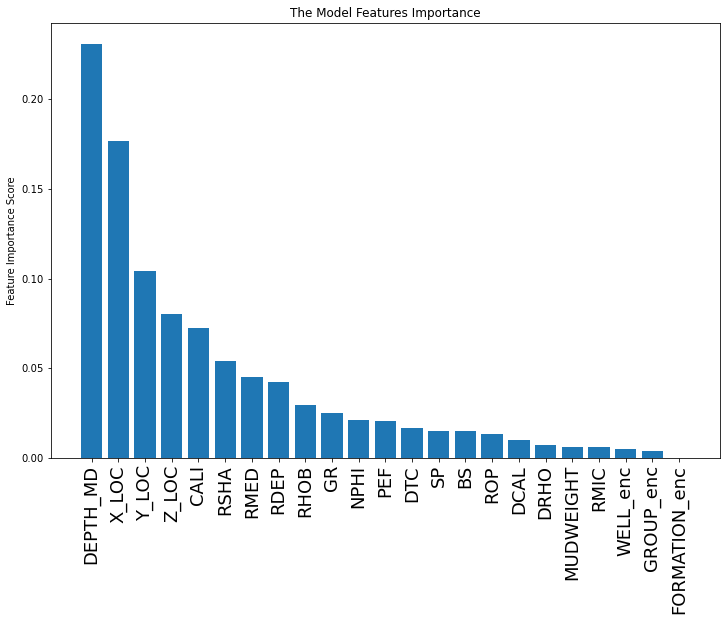

<Figure size 864x576 with 0 Axes>

In [19]:
# the top part of the data to the 110000 out of 130,000+ rows is set to be used as the train data
# while the lower part is set as the test data set. This is used to represent two different data set

model, test_features = facies._train(train_df=train, 
                                     test_df=test, 
                                     target='FORCE_2020_LITHOFACIES_LITHOLOGY',
                                     model='XGB')

In [20]:
predictions = facies.predict(model=model, test_df=test_features)

Predictions complete!


In [21]:
import numpy as np

np.unique(predictions, return_counts=True)

(array([ 0.,  1.,  2.,  5., 10.]),
 array([ 1240,  2238, 20273,  2967,    42], dtype=int64))

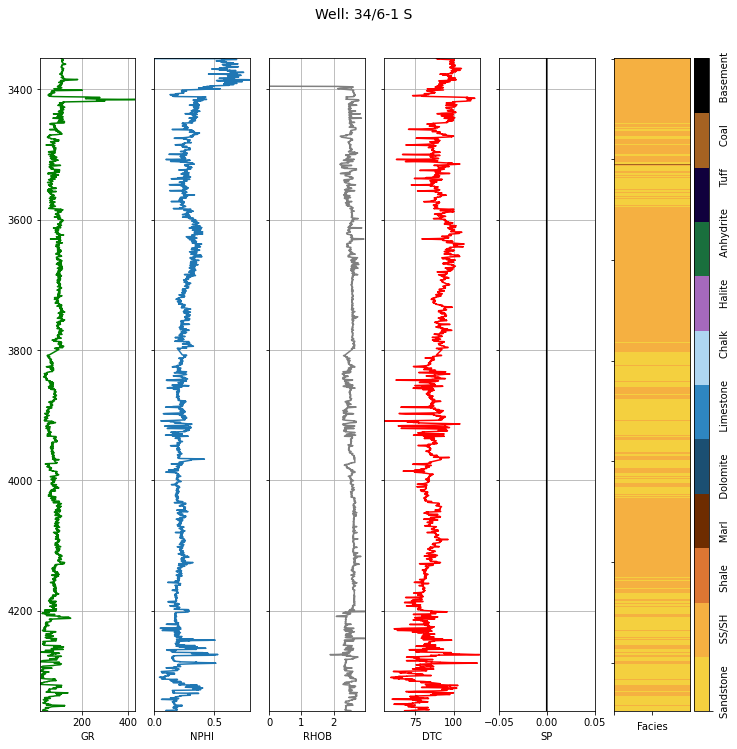

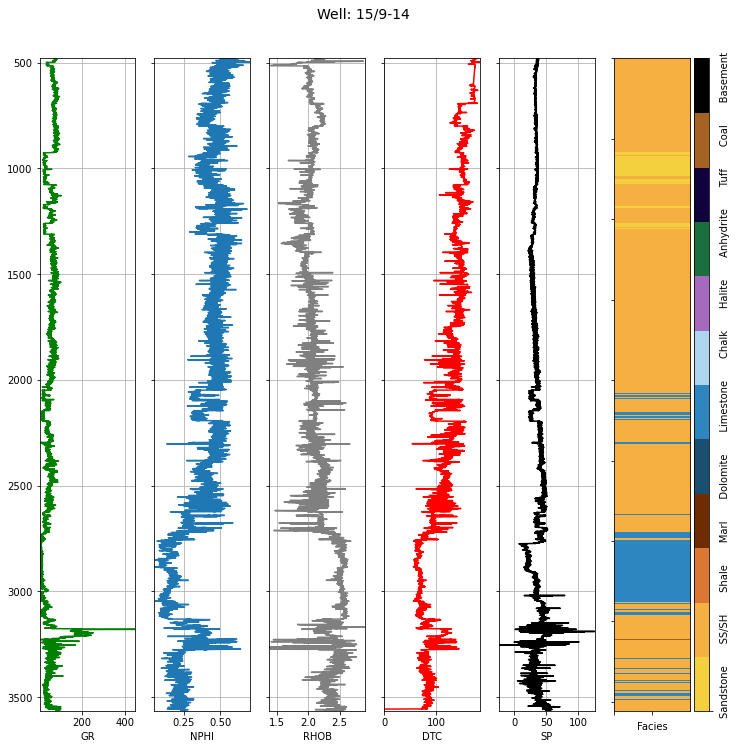

In [22]:
facies.plot_lithofacies(test, predictions, log1='GR', log2='NPHI', 
                        log3='RHOB', log4='DTC', log5='SP', depth_col='DEPTH_MD')

In [23]:
import sklearn.metrics as sklm

def show_evaluation(pred, true):
    
    print(f'Accuracy is: {round((sklm.accuracy_score(true, pred) * 100), 2)} %')
    print(f'F1 is: {round((sklm.f1_score(pred, true.values, average="weighted") * 100), 2)} %')

show_evaluation(predictions, test_labels)   # Random Forest Model

Accuracy is: 47.28 %
F1 is: 56.5 %


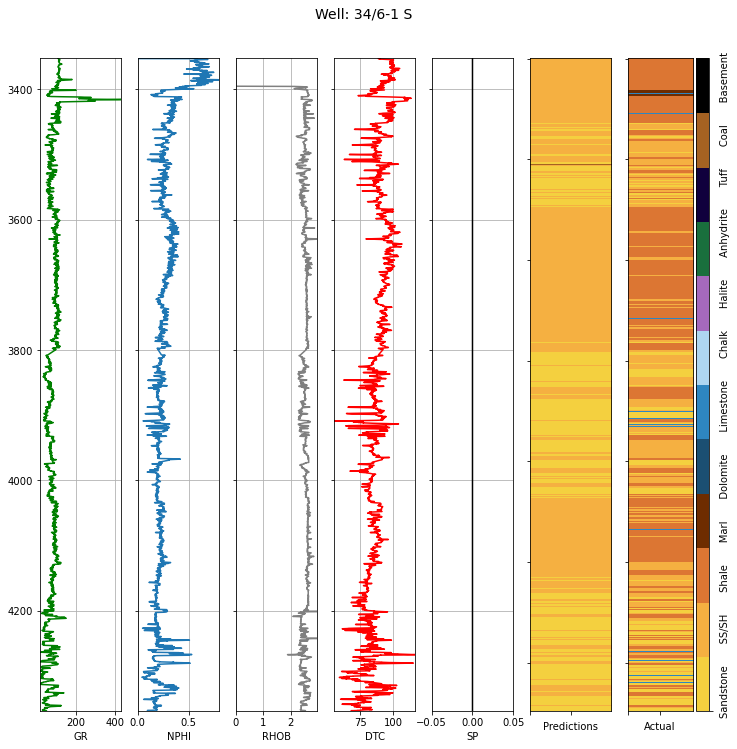

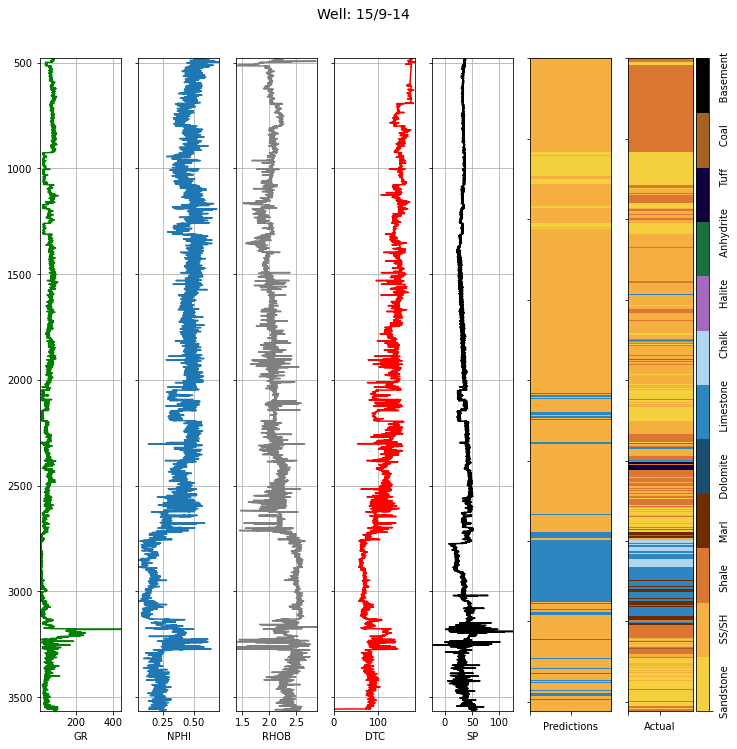

In [25]:
facies.compare_lithofacies(test, labels.FORCE_2020_LITHOFACIES_LITHOLOGY, predictions, log1='GR', log2='NPHI',
                           log3='RHOB', log4='DTC', log5='SP', depth_col='DEPTH_MD')

NB: The more the data provided for training, the better the expected accuraacy of the models

See the official package documentations for more on how to use the codes: https://petroeval.readthedocs.io/

# LICENSE

The well log labels used for this tutorial are licensed CC-BY-4.0. The well log data used for making this notebook tutorial is licensed as Norwegian License for Open Government Data (NLOD) 2.0. Any publication involving the well log data must cite “Lithofacies data was provided by the FORCE Machine Learning competition with well logs and seismic 2020”. For citation please use: Bormann P., Aursand P., Dilib F., Dischington P., Manral S. 2020. 2020 FORCE Machine Learning Contest.